<a href="https://colab.research.google.com/github/super-sg/Data-Analysis-and-Modeling-Mini-Projects/blob/main/Zomato_Restaurants_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Restaurants Data Analysis

# Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
zomato_df = pd.read_csv("zomato.csv", encoding='latin-1')
country_df = pd.read_excel("Country-Code.xlsx")

In [12]:
zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [13]:
country_df.head(2)

,Country Code,Country
0,1,India
1,14,Australia


# 1. Merge the Country sheet and Zomato file :

In [7]:
df = zomato_df.merge(country_df, on='Country Code', how='left')

In [14]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# 2. Top Rated Restaurants in Each City in India

In [18]:
india_df = df[df['Country'] == 'India']

In [19]:
top_indian_restaurants = india_df.sort_values(['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])

In [21]:
top_per_city_india = top_indian_restaurants.groupby('City').head(1)[
    ['City', 'Restaurant Name', 'Aggregate rating', 'Votes']]

In [24]:
top_per_city_india.head(10)

,City,Restaurant Name,Aggregate rating,Votes
637,Agra,Sheroes Hangout,4.9,77
653,Ahmedabad,Cryo Lab,4.6,166
680,Allahabad,Eat On,3.7,105
702,Amritsar,Kesar Da Dhabha,4.1,878
720,Aurangabad,Bhoj Restaurant,3.7,89
728,Bangalore,Toit,4.8,10934
748,Bhopal,Sagar Gaire Fast Food,4.9,427
768,Bhubaneshwar,Barbeque Nation,4.6,154
793,Chandigarh,Barbeque Nation,4.5,1450
822,Chennai,AB's - Absolute Barbecues,4.9,859


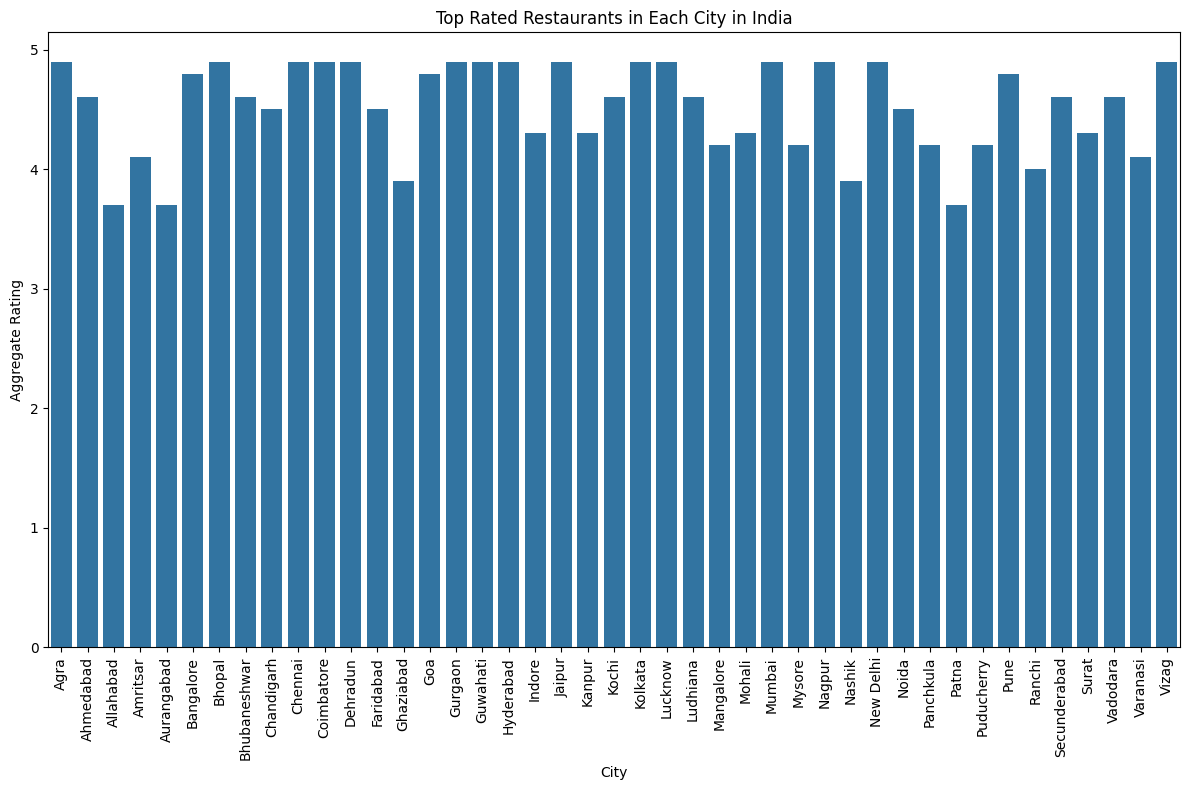

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Aggregate rating', data=top_per_city_india)
plt.xticks(rotation=90)
plt.title('Top Rated Restaurants in Each City in India')
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

# 3. Relationship Between Rating and Votes

In [27]:
correlation = df['Aggregate rating'].corr(df['Votes'])
print(f"Correlation between rating and votes: {correlation}")

Correlation between rating and votes: 0.31369058419541157


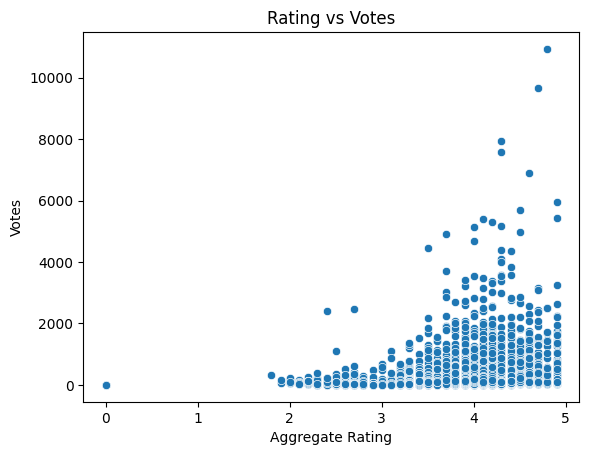

In [29]:
sns.scatterplot(data=df, x='Aggregate rating', y='Votes')
plt.title('Rating vs Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

# 4. Number of Restaurants in Each Country



In [30]:
country_counts = merged_df['Country'].value_counts()
country_counts

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


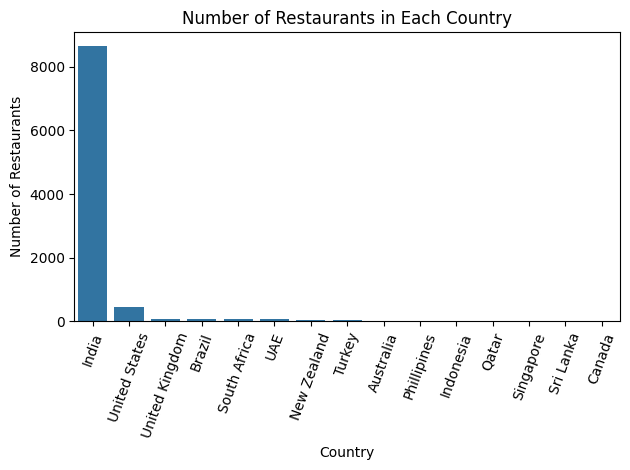

In [36]:
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=70)
plt.title('Number of Restaurants in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

# 5. Top 5 Restaurants with Online Delivery

In [37]:
online_delivery_df = df[df['Has Online delivery'] == 'Yes']

In [38]:
top_online_delivery = online_delivery_df.sort_values(by=['Aggregate rating', 'Votes'], ascending=False).head(5)

In [40]:
top_online_delivery[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']]

,Restaurant Name,City,Aggregate rating,Votes
3013,Naturals Ice Cream,New Delhi,4.9,2620
2350,Zolocrust - Hotel Clarks Amer,Jaipur,4.9,322
1381,Caterspoint,Gurgaon,4.9,223
841,CakeBee,Coimbatore,4.9,200
809,Chili's,Chennai,4.8,1262


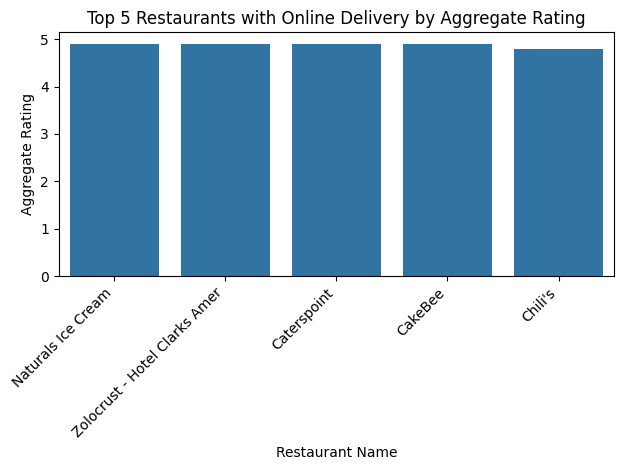

In [43]:
sns.barplot(x='Restaurant Name', y='Aggregate rating', data=top_online_delivery)
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Restaurants with Online Delivery by Aggregate Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

# 6. Cheap But Best Restaurants in a City

In [44]:
city_df = df[df['City'] == 'Bangalore']

In [45]:
cheap_best = city_df[(city_df['Aggregate rating'] >= 4.0)].sort_values(by='Average Cost for two').head(5)

In [46]:
cheap_best[['Restaurant Name', 'Average Cost for two', 'Aggregate rating']]

,Restaurant Name,Average Cost for two,Aggregate rating
737,Eat Street,400,4.3
733,Onesta,600,4.6
741,Onesta,600,4.6
732,Onesta,600,4.3
731,Glen's Bakehouse,800,4.0


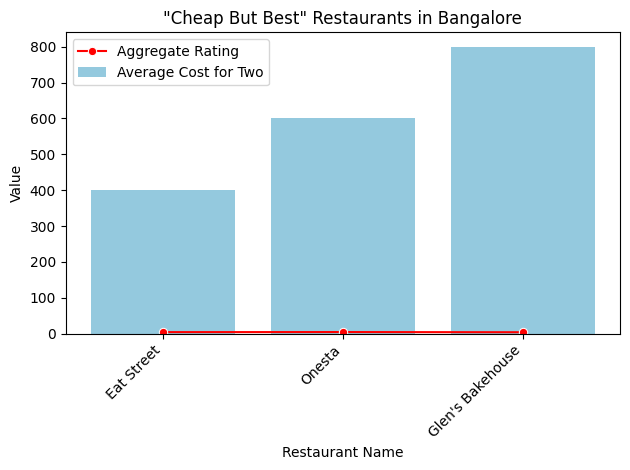

In [48]:
sns.barplot(x='Restaurant Name', y='Average Cost for two', data=cheap_best, color='skyblue', label='Average Cost for Two')
sns.lineplot(x='Restaurant Name', y='Aggregate rating', data=cheap_best, marker='o', color='red', label='Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.title('"Cheap But Best" Restaurants in Bangalore')
plt.xlabel('Restaurant Name')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Top Cuisines in Each Region

In [50]:
top_cuisines = df.groupby('Country')['Cuisines'].value_counts().groupby(level=0).head(1)
top_cuisines

,,count
Country,Cuisines,
Australia,"Breakfast, Coffee and Tea",2
Brazil,Brazilian,8
Canada,Asian,1
India,North Indian,936
Indonesia,"Sunda, Indonesian",3
New Zealand,Cafe,5
Phillipines,Filipino,3
Qatar,Indian,5
Singapore,French,2


# 8. Aggregate Rating of All Restaurants in Each City in a Country

In [61]:
agg_rating_city = df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()
print(agg_rating_city.sort_values(by='Aggregate rating', ascending=False))

           Country              City  Aggregate rating
91    South Africa        Inner City          4.900000
83     Phillipines       Quezon City          4.800000
79     Phillipines       Makati City          4.650000
82     Phillipines        Pasig City          4.633333
80     Phillipines  Mandaluyong City          4.625000
..             ...               ...               ...
61           India         New Delhi          2.438845
15       Australia         Montville          2.400000
123  United States         Mc Millan          2.400000
62           India             Noida          2.036204
42           India         Faridabad          1.866932

[141 rows x 3 columns]


# 9. Does Rating Influence the Cost?

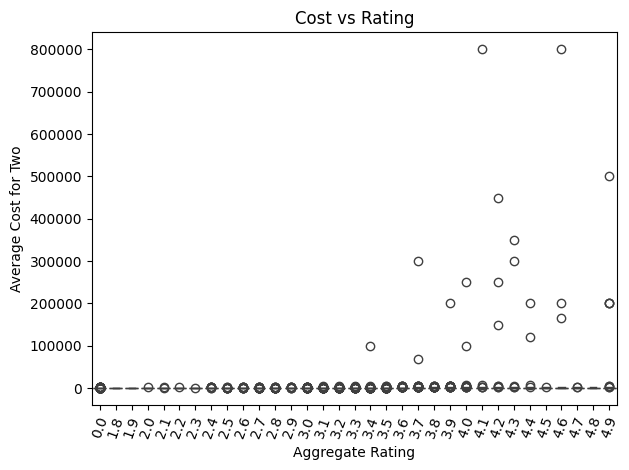

In [70]:
sns.boxplot(data=df, x='Aggregate rating', y='Average Cost for two')
plt.title('Cost vs Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=70) # Rotate x-axis labels
plt.tight_layout()
plt.show()

# 10. Top Percentage Cover of Restaurants in a City

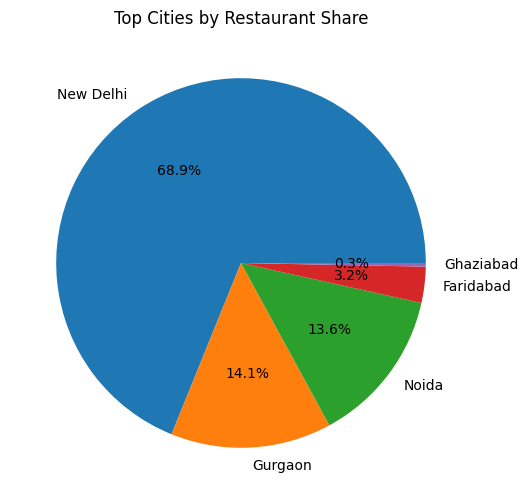

In [71]:
top_cities = df['City'].value_counts().nlargest(5)
top_cities.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Top Cities by Restaurant Share')
plt.ylabel('')
plt.show()

# 11. Top Cuisines in Indian Restaurants

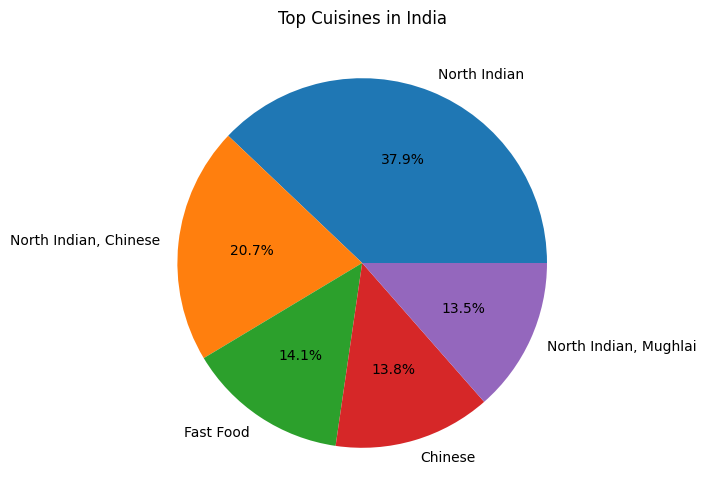

In [72]:
india_df = df[df['Country'] == 'India']
cuisine_counts = india_df['Cuisines'].value_counts().head(5)
cuisine_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Top Cuisines in India')
plt.ylabel('')
plt.show()